In [106]:
import pandas as pd
import numpy as np

In [107]:
df = pd.read_excel('E:\Data\Mini Project\DIM_MATCH.xlsx')
print(df.dtypes)
df.head()

Match_SK                 int64
match_id                 int64
Team1                   object
Team2                   object
match_date      datetime64[ns]
Season_Year              int64
Venue_Name              object
City_Name               object
Country_Name            object
Toss_Winner             object
match_winner            object
Toss_Name               object
Win_Type                object
Outcome_Type            object
ManOfMach               object
Win_Margin               int64
Country_id               int64
dtype: object


,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5,1
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8,1
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7,1
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,2016-05-05,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7,1
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,2016-05-06,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5,1


In [108]:
df.describe()

,Match_SK,match_id,Season_Year,Win_Margin,Country_id
count,637.000000,6.370000e+02,637.000000,637.000000,637.000000
mean,318.000000,6.378825e+05,2012.497645,17.028257,1.152276
std,184.030342,2.356312e+05,2.776600,22.149062,0.438388
min,0.000000,3.359870e+05,2008.000000,0.000000,1.000000
25%,159.000000,4.191550e+05,2010.000000,6.000000,1.000000
50%,318.000000,5.483830e+05,2012.000000,8.000000,1.000000
75%,477.000000,8.297480e+05,2015.000000,20.000000,1.000000
max,636.000000,1.082650e+06,2017.000000,146.000000,3.000000


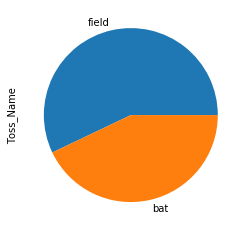

In [109]:
df['Toss_Name']=df['Toss_Name'].str.lower()
df['Toss_Name'].value_counts().plot.pie()

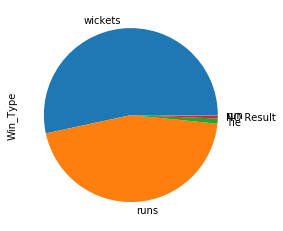

In [111]:
df['Win_Type'].value_counts().plot.pie()

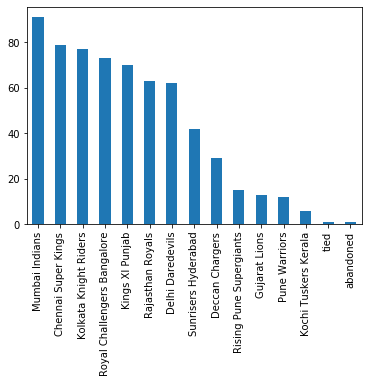

In [110]:
df['match_winner'].value_counts().plot.bar()

In [112]:
df.shape

(637, 17)

In [113]:
df1=df[df['match_winner'].notna()]
df1=df1[(df1['Outcome_Type']!='No Result')&(df1['Outcome_Type']!='abandoned')&(df1['Outcome_Type']!='tied')]
print("After Dropping No results, Shape=" + str(df1.shape))
df1.head()
df1['Outcome_Type'].unique()

After Dropping No results, Shape=(632, 17)


array(['Result', 'Superover'], dtype=object)

In [114]:
dropped_features = ['match_id','Match_SK','match_date','Venue_Name']
df1=df1.drop(dropped_features,axis=1)
df_copy=df1.copy()
df1.head()

,Team1,Team2,Season_Year,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,Royal Challengers Bangalore,Kolkata Knight Riders,2016,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5,1
1,Gujarat Lions,Delhi Daredevils,2016,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8,1
2,Kolkata Knight Riders,Kings XI Punjab,2016,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7,1
3,Delhi Daredevils,Rising Pune Supergiants,2016,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7,1
4,Sunrisers Hyderabad,Gujarat Lions,2016,Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5,1


In [115]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [116]:
rows= []

for var1 in df1:
    col = []
    cramers =cramers_v(df1[var1], df1['match_winner']) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns = ['match_winner'], index =df1.columns)
df2

,match_winner
Team1,0.46
Team2,0.42
Season_Year,0.22
City_Name,0.38
Country_Name,0.13
Toss_Winner,0.49
match_winner,1.00
Toss_Name,0.22
Win_Type,0.06
Outcome_Type,0.00


In [117]:
rows= []

for var1 in df1:
    col = []
    for var2 in df1:
        cramers =cramers_v(df1[var1], df1[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(cramers_results, columns = df1.columns, index =df1.columns)
df2.head()

,Team1,Team2,Season_Year,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
Team1,1.00,0.01,0.22,0.78,0.16,0.44,0.46,0.25,0.00,0.00,0.26,0.00,0.16
Team2,0.01,1.00,0.21,0.00,0.10,0.47,0.42,0.11,0.11,0.00,0.25,0.00,0.10
Season_Year,0.22,0.21,1.00,0.45,0.80,0.22,0.22,0.30,0.00,0.00,0.29,0.03,0.80
City_Name,0.78,0.00,0.45,1.00,0.98,0.30,0.38,0.26,0.16,0.00,0.19,0.01,0.98
Country_Name,0.16,0.10,0.80,0.98,1.00,0.08,0.13,0.10,0.00,0.06,0.23,0.16,1.00


In [118]:
info={}
from info_gain import info_gain
for var1 in df1.columns:
    info[var1]=round(info_gain.info_gain(df1[var1],df1['match_winner']),4)
info

{'Team1': 0.7267,
 'Team2': 0.5545,
 'Season_Year': 0.2883,
 'City_Name': 0.7151,
 'Country_Name': 0.0411,
 'Toss_Winner': 0.7049,
 'match_winner': 2.3558,
 'Toss_Name': 0.0357,
 'Win_Type': 0.034,
 'Outcome_Type': 0.0094,
 'ManOfMach': 1.979,
 'Win_Margin': 0.5218,
 'Country_id': 0.0411}

In [119]:
c = df1.Team1.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'Chennai Super Kings', 1: 'Deccan Chargers', 2: 'Delhi Daredevils', 3: 'Gujarat Lions', 4: 'Kings XI Punjab', 5: 'Kochi Tuskers Kerala', 6: 'Kolkata Knight Riders', 7: 'Mumbai Indians', 8: 'Pune Warriors', 9: 'Rajasthan Royals', 10: 'Rising Pune Supergiants', 11: 'Royal Challengers Bangalore', 12: 'Sunrisers Hyderabad'}


In [120]:
for var1 in df1.columns:
    if df1[var1].dtype == 'object':
        df1[var1]=df1[var1].astype('category').cat.codes
print(df1.dtypes)
df1.head()

Team1            int8
Team2            int8
Season_Year     int64
City_Name        int8
Country_Name     int8
Toss_Winner      int8
match_winner     int8
Toss_Name        int8
Win_Type         int8
Outcome_Type     int8
ManOfMach       int16
Win_Margin      int64
Country_id      int64
dtype: object


,Team1,Team2,Season_Year,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,11,6,2016,2,0,6,6,1,3,0,14,5,1
1,3,2,2016,29,0,2,2,1,3,0,152,8,1
2,6,4,2016,22,0,4,6,1,2,0,14,7,1
3,2,10,2016,10,0,11,10,1,3,0,17,7,1
4,12,3,2016,14,0,13,12,1,3,0,22,5,1


In [121]:
Y=df1['match_winner']
X=df1.drop(['match_winner'],axis=1)

In [122]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,CategoricalNB
# Sequential Forward Selection(sfs)
sfs = SFS(DecisionTreeClassifier(criterion='entropy'),
           k_features=8,
           forward=False,
           floating=False,
           scoring = 'accuracy',
           cv = 6)
sfs.fit(X, Y)
sfs.k_feature_names_

('Team1',
 'Team2',
 'Country_Name',
 'Toss_Winner',
 'Toss_Name',
 'Win_Type',
 'Outcome_Type',
 'Country_id')

In [123]:
sfs = SFS(GaussianNB(),
           k_features=8,
           forward=False,
           floating=False,
           scoring = 'accuracy',
           cv = 6)
sfs.fit(X, Y)
sfs.k_feature_names_

('Team1',
 'Team2',
 'Season_Year',
 'City_Name',
 'Toss_Winner',
 'Toss_Name',
 'Win_Type',
 'ManOfMach')

In [124]:
from sklearn.neighbors import KNeighborsClassifier
sfs = SFS(KNeighborsClassifier(n_neighbors=10),
           k_features=8,
           forward=False,
           floating=False,
           scoring = 'accuracy',
           cv = 6)
sfs.fit(X, Y)
sfs.k_feature_names_

('Team1',
 'City_Name',
 'Country_Name',
 'Toss_Winner',
 'Toss_Name',
 'Win_Type',
 'Outcome_Type',
 'Country_id')

In [125]:
from ReliefF import ReliefF
fs = ReliefF(n_neighbors=10, n_features_to_keep=9)
X_new=fs.fit_transform(np.asarray(X),np.asarray(Y))
rel_data=pd.DataFrame(data=X_new)
rel_data.columns

Index(['Team2', 'Win_Margin', 'Toss_Winner', 'Team1', 'City_Name',
       'Season_Year', 'Win_Type', 'Toss_Name', 'Country_id'],
      dtype='object')

# Extracting Feature Subsets

In [344]:
df_feature=df_copy[['Team1','Team2','City_Name','Season_Year','Toss_Winner','Win_Type','Outcome_Type','match_winner']]
df_feature.head()

,Team1,Team2,City_Name,Season_Year,Toss_Winner,Win_Type,Outcome_Type,match_winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,2016,Kolkata Knight Riders,wickets,Result,Kolkata Knight Riders
1,Gujarat Lions,Delhi Daredevils,Rajkot,2016,Delhi Daredevils,wickets,Result,Delhi Daredevils
2,Kolkata Knight Riders,Kings XI Punjab,Kolkata,2016,Kings XI Punjab,runs,Result,Kolkata Knight Riders
3,Delhi Daredevils,Rising Pune Supergiants,Delhi,2016,Rising Pune Supergiants,wickets,Result,Rising Pune Supergiants
4,Sunrisers Hyderabad,Gujarat Lions,Hyderabad,2016,Sunrisers Hyderabad,wickets,Result,Sunrisers Hyderabad


In [284]:
df_home=df_feature.copy()
df_home.loc[df_home['Team1']==df_home['match_winner'],'Result']=1
df_home.loc[df_home['Team1']!=df_home['match_winner'],'Result']=0
df_home.head()

,Team1,Team2,City_Name,Season_Year,Toss_Winner,Win_Type,Outcome_Type,match_winner,Result
0,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,2016,Kolkata Knight Riders,wickets,Result,Kolkata Knight Riders,0.0
1,Gujarat Lions,Delhi Daredevils,Rajkot,2016,Delhi Daredevils,wickets,Result,Delhi Daredevils,0.0
2,Kolkata Knight Riders,Kings XI Punjab,Kolkata,2016,Kings XI Punjab,runs,Result,Kolkata Knight Riders,1.0
3,Delhi Daredevils,Rising Pune Supergiants,Delhi,2016,Rising Pune Supergiants,wickets,Result,Rising Pune Supergiants,0.0
4,Sunrisers Hyderabad,Gujarat Lions,Hyderabad,2016,Sunrisers Hyderabad,wickets,Result,Sunrisers Hyderabad,1.0


In [285]:
df_home=df_home.drop('Toss_Winner',axis=1)
df_home=df_home.drop('match_winner',axis=1)
df_home.head()

,Team1,Team2,City_Name,Season_Year,Win_Type,Outcome_Type,Result
0,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,2016,wickets,Result,0.0
1,Gujarat Lions,Delhi Daredevils,Rajkot,2016,wickets,Result,0.0
2,Kolkata Knight Riders,Kings XI Punjab,Kolkata,2016,runs,Result,1.0
3,Delhi Daredevils,Rising Pune Supergiants,Delhi,2016,wickets,Result,0.0
4,Sunrisers Hyderabad,Gujarat Lions,Hyderabad,2016,wickets,Result,1.0


In [286]:
for var1 in df_home.columns:
    if df_home[var1].dtype == 'object':
        df_home[var1]=df_home[var1].astype('category').cat.codes
df_home.head()

,Team1,Team2,City_Name,Season_Year,Win_Type,Outcome_Type,Result
0,11,6,2,2016,3,0,0.0
1,3,2,29,2016,3,0,0.0
2,6,4,22,2016,2,0,1.0
3,2,10,10,2016,3,0,0.0
4,12,3,14,2016,3,0,1.0


In [133]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score
from statistics import mean
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [134]:
def misclassif(y_pred,y_test):
    count=0
    for (predicted,actual) in zip(y_pred,y_test):
        if predicted!=actual:
            count+=1
    return count

In [208]:
def calc_metric_home(model):
    accuracy_stratified=[]
    precision_stratified=[]
    recall_stratified=[]
    misclassified=0
    x=df_home.drop('Result',axis=1)
    y=df_home.Result
    for train_index, test_index in skf.split(x, y): 
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index] 
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        X= x_train_fold
        Y= y_train_fold
        model.fit(X,Y)
        y_pred=model.predict(x_test_fold)
        misclassified+=misclassif(y_pred,y_test_fold)
        accuracy_stratified.append(accuracy_score(y_test_fold,y_pred))
        precision_stratified.append(precision_score(y_test_fold,y_pred,average='weighted',zero_division=1))
        recall_stratified.append(recall_score(y_test_fold,y_pred,average='weighted',zero_division=1))
    accuracy=mean(accuracy_stratified)*100
    precision=mean(precision_stratified)*100
    recall=mean(recall_stratified)*100
    metrics={}
    metrics['accuracy']=accuracy
    metrics['precision']=precision
    metrics['recall']=recall
    metrics['misclassified']=misclassified
    print(metrics)
    return metrics

In [173]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models=[]
model1=CategoricalNB()
model2=DecisionTreeClassifier(criterion='entropy')
model3=RandomForestClassifier()
model4=KNeighborsClassifier(n_neighbors=10)
models.append(model1)
models.append(model2)
models.append(model3)
models.append(model4)

In [182]:
#Naive Bayes
hm_model1=calc_metric_home(model1)

{'accuracy': 55.6969246031746, 'precision': 58.01056965294061, 'recall': 55.6969246031746, 'misclassified': 280}


In [188]:
#Model Trees
hm_model2=calc_metric_home(model2)

{'accuracy': 52.85962301587301, 'precision': 56.1642070110998, 'recall': 64.70588235294117, 'misclassified': 298}


In [200]:
#Random Forest
hm_model3=calc_metric_home(model3)

{'accuracy': 52.86210317460317, 'precision': 55.95833170453663, 'recall': 60.192697768762685, 'misclassified': 298}


In [209]:
#KNN
hm_model4=calc_metric_home(model4)

{'accuracy': 52.22718253968254, 'precision': 52.397638220252894, 'recall': 52.22718253968254, 'misclassified': 302}


In [345]:
df_toss=df_feature.copy()
df_toss.loc[df_toss['Toss_Winner']==df_toss['match_winner'],'Result']=1
df_toss.loc[df_toss['Toss_Winner']!=df_toss['match_winner'],'Result']=0
df_toss.head()

,Team1,Team2,City_Name,Season_Year,Toss_Winner,Win_Type,Outcome_Type,match_winner,Result
0,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,2016,Kolkata Knight Riders,wickets,Result,Kolkata Knight Riders,1.0
1,Gujarat Lions,Delhi Daredevils,Rajkot,2016,Delhi Daredevils,wickets,Result,Delhi Daredevils,1.0
2,Kolkata Knight Riders,Kings XI Punjab,Kolkata,2016,Kings XI Punjab,runs,Result,Kolkata Knight Riders,0.0
3,Delhi Daredevils,Rising Pune Supergiants,Delhi,2016,Rising Pune Supergiants,wickets,Result,Rising Pune Supergiants,1.0
4,Sunrisers Hyderabad,Gujarat Lions,Hyderabad,2016,Sunrisers Hyderabad,wickets,Result,Sunrisers Hyderabad,1.0


In [346]:
for var1 in df_toss.columns:
    if df_toss[var1].dtype == 'object':
        df_toss[var1]=df_toss[var1].astype('category').cat.codes
df_toss.head()

,Team1,Team2,City_Name,Season_Year,Toss_Winner,Win_Type,Outcome_Type,match_winner,Result
0,11,6,2,2016,6,3,0,6,1.0
1,3,2,29,2016,2,3,0,2,1.0
2,6,4,22,2016,4,2,0,6,0.0
3,2,10,10,2016,11,3,0,10,1.0
4,12,3,14,2016,13,3,0,12,1.0


In [347]:
df_toss=df_toss.drop('Toss_Winner',axis=1)
df_toss=df_toss.drop('match_winner',axis=1)
df_toss.head()

,Team1,Team2,City_Name,Season_Year,Win_Type,Outcome_Type,Result
0,11,6,2,2016,3,0,1.0
1,3,2,29,2016,3,0,1.0
2,6,4,22,2016,2,0,0.0
3,2,10,10,2016,3,0,1.0
4,12,3,14,2016,3,0,1.0


In [348]:
def calc_metric_toss(model):
    accuracy_stratified=[]
    precision_stratified=[]
    recall_stratified=[]
    misclassified=0
    x=df_toss.drop('Result',axis=1)
    y=df_toss.Result
    for train_index, test_index in skf.split(x, y): 
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index] 
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        X= x_train_fold
        Y= y_train_fold
        model.fit(X,Y)
        y_pred=model.predict(x_test_fold)
        misclassified+=misclassif(y_pred,y_test_fold)
        accuracy_stratified.append(accuracy_score(y_test_fold,y_pred))
        precision_stratified.append(precision_score(y_test_fold,y_pred,average='weighted',zero_division=1))
        recall_stratified.append(recall_score(y_test_fold,y_pred,average='weighted',zero_division=1))
    accuracy=mean(accuracy_stratified)*100
    precision=mean(precision_stratified)*100
    recall=mean(recall_stratified)*100
    metrics={}
    metrics['accuracy']=accuracy
    metrics['precision']=precision
    metrics['recall']=recall
    metrics['misclassified']=misclassified
    print(metrics)
    return metrics

In [349]:
model1=CategoricalNB()
model2=DecisionTreeClassifier(criterion='entropy')
model3=RandomForestClassifier()
model4=KNeighborsClassifier(n_neighbors=10)

In [350]:
#Naive Bayes
tm_model1=calc_metric_toss(model1)

{'accuracy': 51.09623015873016, 'precision': 51.05969852421024, 'recall': 51.09623015873016, 'misclassified': 309}


In [356]:
#Model Trees
tm_model2=calc_metric_toss(model2)
tm_model2

{'accuracy': 58.072916666666664, 'precision': 58.21097063204831, 'recall': 58.072916666666664, 'misclassified': 265}


{'accuracy': 58.072916666666664,
 'precision': 58.21097063204831,
 'recall': 58.072916666666664,
 'misclassified': 265}

In [353]:
#Random Forest
tm_model3=calc_metric_toss(model3)
tm_model3

{'accuracy': 56.96180555555556, 'precision': 57.18809607209132, 'recall': 56.96180555555556, 'misclassified': 272}


{'accuracy': 56.96180555555556,
 'precision': 57.18809607209132,
 'recall': 56.96180555555556,
 'misclassified': 272}

In [316]:
#KNN
model4=KNeighborsClassifier()
tm_model4=calc_metric_toss(model4)

{'accuracy': 61.37152777777778, 'precision': 61.8079834358086, 'recall': 61.37152777777778, 'misclassified': 244}


In [357]:
accuracy_home=(hm_model3['accuracy'],hm_model4['accuracy'],hm_model2['accuracy'],hm_model1['accuracy'])
accuracy_toss=(tm_model3['accuracy'],tm_model4['accuracy'],tm_model2['accuracy'],tm_model1['accuracy'])

In [358]:
precision_home=(hm_model3['precision'],hm_model4['precision'],hm_model2['precision'],hm_model1['precision'])
precision_toss=(tm_model3['precision'],tm_model4['precision'],tm_model2['precision'],tm_model1['precision'])

In [359]:
recall_home=(hm_model3['recall'],hm_model4['recall'],hm_model2['recall'],hm_model1['recall'])
recall_toss=(tm_model3['recall'],tm_model4['recall'],tm_model2['recall'],tm_model1['recall'])

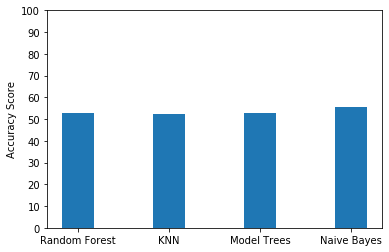

In [361]:
#Fig 3.4A
import matplotlib.pyplot as plt
plt.bar(['Random Forest','KNN','Model Trees','Naive Bayes'],accuracy_home,width=0.35)
plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0, 101, 10)) 
axes=plt.gca()
axes.set_ylim([0,100])
plt.show()

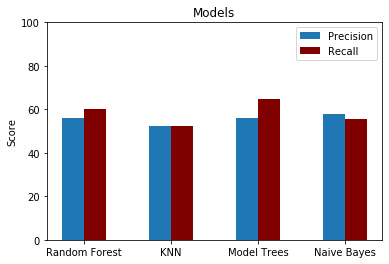

In [362]:
#Fig 3.4B
ind = np.arange(4)
width = 0.25
plt.bar(ind, precision_home, width, label='Precision')
plt.bar(ind + width, recall_home, width,
    label='Recall',color='maroon')

plt.ylabel('Score')
plt.title('Models')
axes=plt.gca()
axes.set_ylim([0,100])
plt.xticks(ind + width / 2, ('Random Forest', 'KNN', 'Model Trees', 'Naive Bayes'))
plt.legend(loc='best')
plt.show()

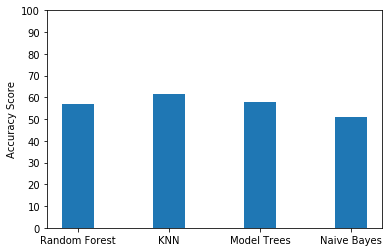

In [363]:
#Fig 3.4c
plt.bar(['Random Forest','KNN','Model Trees','Naive Bayes'],accuracy_toss,width=0.35)
plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0, 101, 10)) 
axes=plt.gca()
axes.set_ylim([0,100])
plt.show()

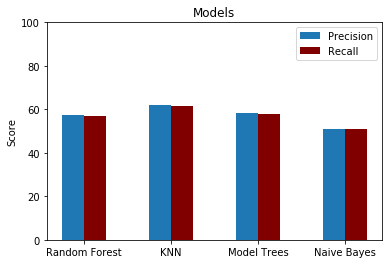

In [364]:
#Fig 3.4D
ind = np.arange(4)
width = 0.25
plt.bar(ind, precision_toss, width, label='Precision')
plt.bar(ind + width, recall_toss, width,
    label='Recall',color='maroon')

plt.ylabel('Score')
plt.title('Models')
axes=plt.gca()
axes.set_ylim([0,100])
plt.xticks(ind + width / 2, ('Random Forest', 'KNN', 'Model Trees', 'Naive Bayes'))
plt.legend(loc='best')
plt.show()